In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
suicide_data = pd.read_csv('https://github.com/atharvarya12/Projects/blob/main/analysis/data-set/Suicides%20in%20India%202001-2012%20-%20Suicides%20in%20India%202001-2012.csv')
gdp_data = pd.read_csv('https://github.com/atharvarya12/Projects/blob/main/analysis/data-set/India_GDP_2001-2012%20-%20Sheet2.csv')

In [10]:
print(suicide_data.columns)
print(gdp_data.columns)

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')
Index(['Unnamed: 0', 'Year', 'GDP in (Billion) $', 'Per Capita in rupees',
       'Growth %'],
      dtype='object')


In [26]:
# Merge the datasets based on the common year column
merged_data = pd.merge(suicide_data, gdp_data, on='Year')  
print(merged_data)

                State  Year      Type_code   
0       A & N Islands  2001         Causes  \
1       A & N Islands  2001         Causes   
2       A & N Islands  2001         Causes   
3       A & N Islands  2001         Causes   
4       A & N Islands  2001         Causes   
...               ...   ...            ...   
237514    West Bengal  2012  Social_Status   
237515    West Bengal  2012  Social_Status   
237516    West Bengal  2012  Social_Status   
237517    West Bengal  2012  Social_Status   
237518    West Bengal  2012  Social_Status   

                                           Type  Gender Age_group  Total   
0                            Illness (Aids/STD)  Female      0-14      0  \
1       Bankruptcy or Sudden change in Economic  Female      0-14      0   
2       Cancellation/Non-Settlement of Marriage  Female      0-14      0   
3             Physical Abuse (Rape/Incest Etc.)  Female      0-14      0   
4                                 Dowry Dispute  Female      0-14  

In [15]:
merged_data.shape
merged_data.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total',
       'Unnamed: 0', 'GDP in (Billion) $', 'Per Capita in rupees', 'Growth %'],
      dtype='object')

In [16]:
merged_data = merged_data.drop('Unnamed: 0', axis=1)

In [17]:
merged_data.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total',
       'GDP in (Billion) $', 'Per Capita in rupees', 'Growth %'],
      dtype='object')

In [20]:
merged_data['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [19]:
merged_data['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [21]:

merged_data['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [22]:
merged_data['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [23]:
merged_data['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [25]:
suicide_df = merged_data.drop(merged_data[merged_data.Total == 0].index)
print(suicide_df)

                State  Year      Type_code                           Type   
13      A & N Islands  2001         Causes                   Love Affairs  \
20      A & N Islands  2001         Causes  Other Causes (Please Specity)   
32      A & N Islands  2001         Causes        Other Prolonged Illness   
47      A & N Islands  2001         Causes         Failure in Examination   
54      A & N Islands  2001         Causes        Other Prolonged Illness   
...               ...   ...            ...                            ...   
237514    West Bengal  2012  Social_Status                      Seperated   
237515    West Bengal  2012  Social_Status                Widowed/Widower   
237516    West Bengal  2012  Social_Status                        Married   
237517    West Bengal  2012  Social_Status                       Divorcee   
237518    West Bengal  2012  Social_Status                  Never Married   

        Gender Age_group  Total  GDP in (Billion) $  Per Capita in rupees  

In [27]:
suicide_df = suicide_df.set_index(pd.Index([i for i in range(0, 102038)]))
suicide_df

,State,Year,Type_code,Type,Gender,Age_group,Total,GDP in (Billion) $,Per Capita in rupees,Growth %
0,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1,485.44,36160,4.82
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1,485.44,36160,4.82
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1,485.44,36160,4.82
3,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1,485.44,36160,4.82
4,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8,485.44,36160,4.82
...,...,...,...,...,...,...,...,...,...,...
102033,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149,1827.64,115520,5.46
102034,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233,1827.64,115520,5.46
102035,West Bengal,2012,Social_Status,Married,Male,0-100+,5451,1827.64,115520,5.46
102036,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189,1827.64,115520,5.46


In [44]:
suicide_df = suicide_df.drop(suicide_df[(suicide_df.State == 'Total (Uts)') | (suicide_df.State == 'Total (All India)') | 
               (suicide_df.State == 'Total (States)')].index)

In [45]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


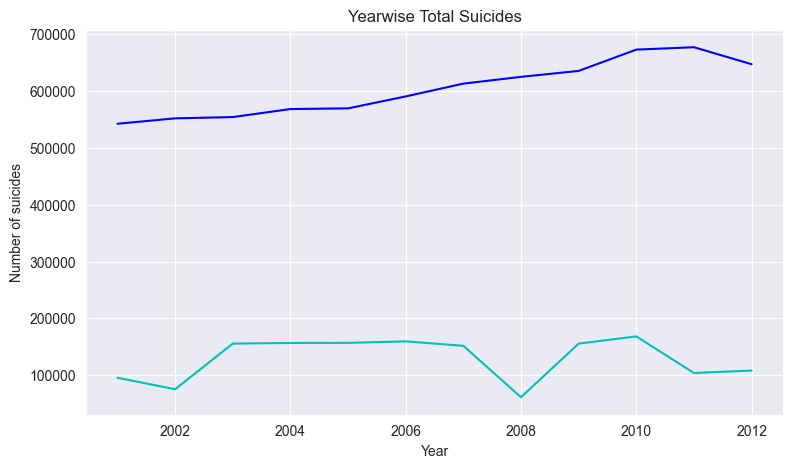

In [46]:
yearwise_total_suicide = suicide_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

yearwise_gdp_growth = merged_data.groupby("Year")["Growth %"].sum()


#plotting this in a bar graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'b')
yearwise_gdp_growth.plot(kind='line', figsize= (9, 5), color = 'c' )

plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');

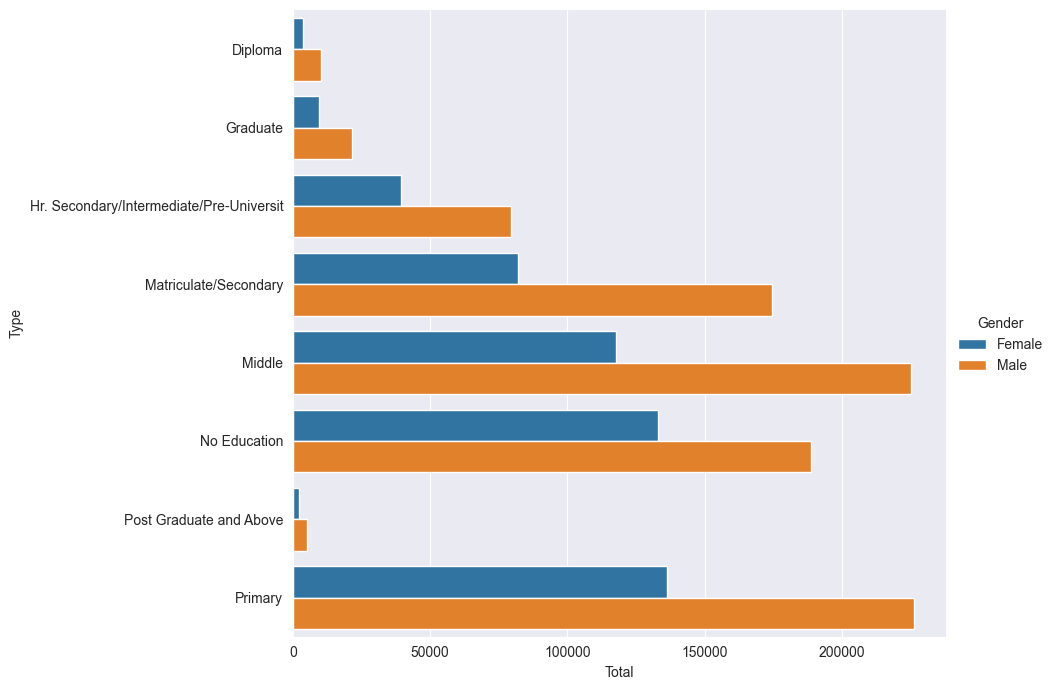

In [47]:

education_status = pd.DataFrame(suicide_df[suicide_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status


g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/8.27);
sns.set_style('whitegrid');


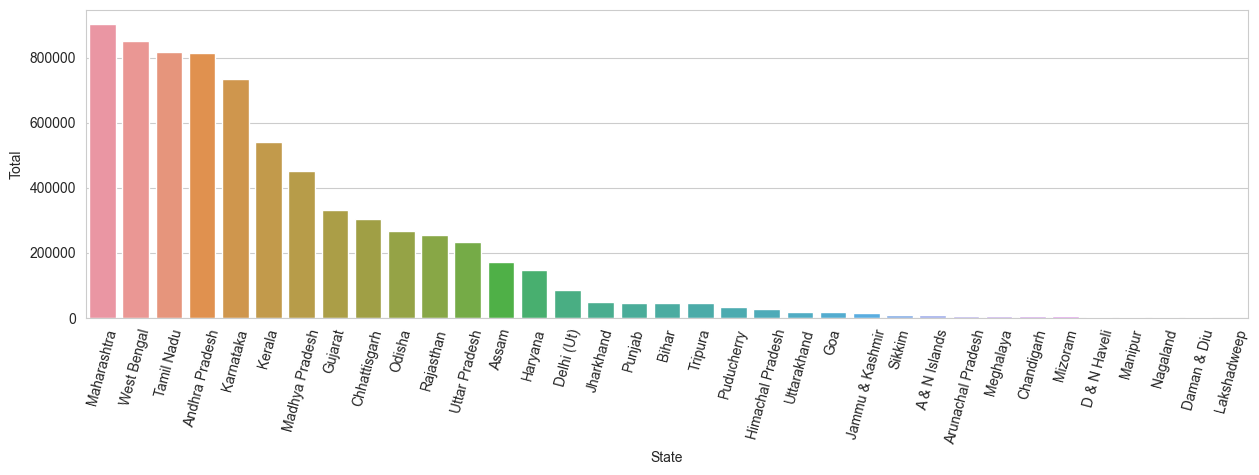

In [48]:

statewise_total_suicide = suicide_df.groupby("State")["Total"].sum()

filter_state = pd.DataFrame(statewise_total_suicide.reset_index())
sort_state = filter_state.sort_values('Total',ascending = False)
f, ax = plt.subplots(figsize=(15, 4))
sns.barplot(y = 'Total', x = 'State',data = sort_state, edgecolor = 'w')
plt.xticks(rotation=75);
plt.show()

Gender
Female    46269
Male      54841
Name: count, dtype: int64


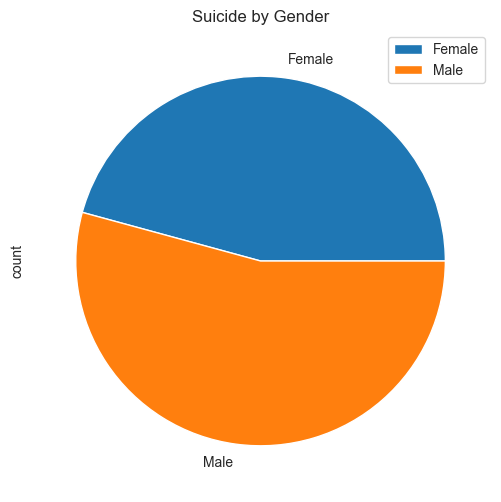

In [49]:
counts = statewise_df['Gender'].value_counts().sort_index()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

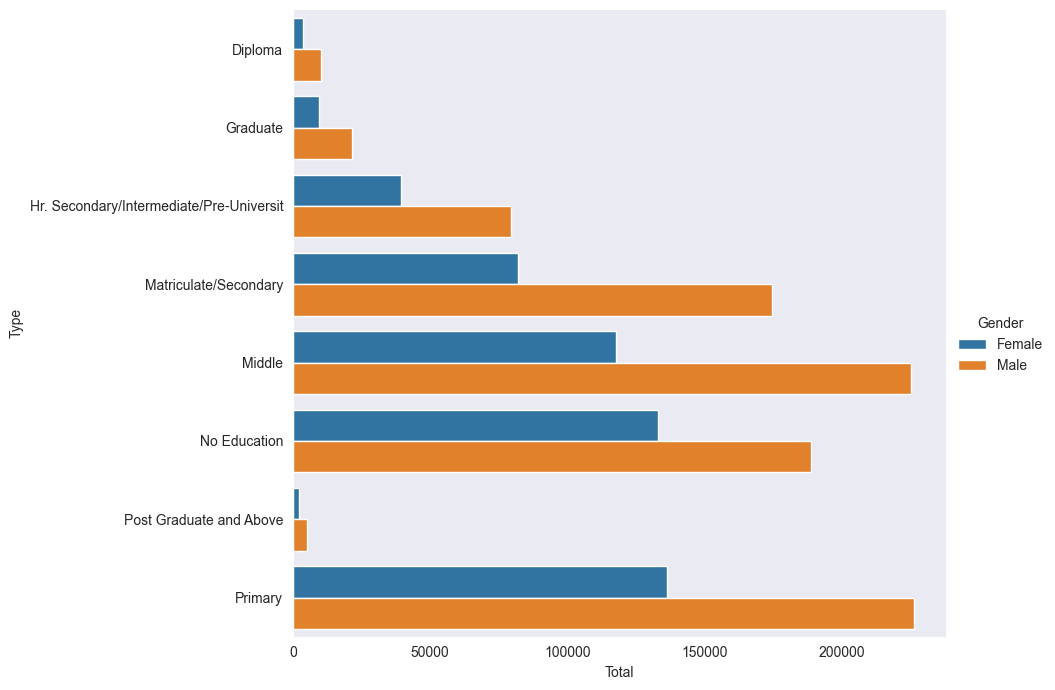

In [53]:
#filtering the data as per the educational background
education_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
education_status

#plotting the above data
g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/8.27);
sns.set_style('darkgrid');

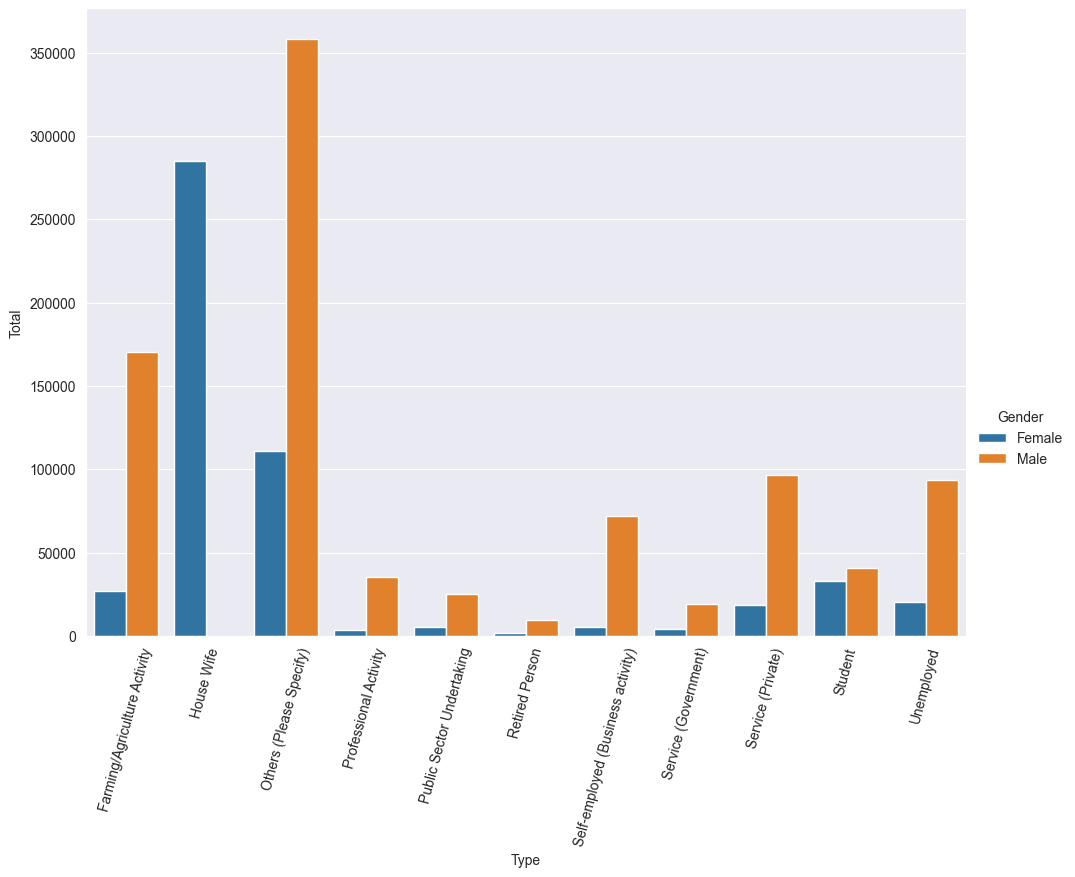

In [55]:
filter_social_status = pd.DataFrame(suicide_df[suicide_df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/8.27);
g.set_xticklabels(rotation=75);